# DIABETES RISK ANALYSIS

## Project Summary

## Objective:

1.To analyze the PIMA Indians Diabetes dataset and understand the distribution of key health indicators (glucose, BMI, age, pregnancies, etc.).

2.To explore relationships between medical features and diabetes outcomes (0 = non-diabetic, 1 = diabetic).

3.To identify the most significant risk factors influencing the likelihood of diabetes.

4.To validate findings using statistical hypothesis testing for reliability.

5.To provide data-driven insights that can support healthcare research and early risk detection.


## Problem Statement:

Diabetes is a growing global health challenge, leading to severe medical complications if not diagnosed early.

Medical datasets often contain missing values, noise, and unclear relationships, making analysis difficult.

Identifying early indicators of diabetes is essential for preventive healthcare and cost reduction.

Healthcare providers need a data-backed way to prioritize high-risk groups for timely interventions.

There is a lack of clear insight into how factors like glucose, BMI, age, and pregnancies collectively influence diabetes risk.


## Business Context

In the healthcare domain, early detection of diabetes risk plays a vital role in:

Improving patient outcomes by recommending lifestyle modifications or preventive treatment.

Reducing healthcare costs through early intervention rather than expensive treatments later.

Supporting medical research by providing data-driven insights into the most influential health factors.


## Data Overview

#### Dataset Source – 
The PIMA Indians Diabetes Dataset is taken from the UCI Machine Learning Repository, widely used for medical research and predictive modeling.

#### Number of Records & Features – 
The dataset contains 768 patient records with 8 independent medical predictor variables and 1 dependent variable (Outcome).

#### Features Description –
Pregnancies,
Glucose,
BloodPressure,
SkinThickness,
Insulin,
BMI,
DiabetesPedigreeFunctio,
Age,
Outcome

#### Target Variable –
The Outcome column indicates diabetes presence:
0 → Non-diabetic (500 cases)
1 → Diabetic (268 cases)

#### Class Imbalance –
The dataset is slightly imbalanced (65% non-diabetic vs 35% diabetic), which is important to consider in statistical analysis and modeling.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import ttest_ind, chi2_contingency

# Style
sns.set(style="whitegrid")


In [2]:
df = pd.read_csv("diabetes.csv")


In [3]:
df.head()


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [28]:
print(df.shape)

(768, 12)


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [5]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [6]:
df['Outcome'].value_counts()

Outcome
0    500
1    268
Name: count, dtype: int64

In [8]:
df.nunique()

Pregnancies                  17
Glucose                     136
BloodPressure                47
SkinThickness                51
Insulin                     186
BMI                         248
DiabetesPedigreeFunction    517
Age                          52
Outcome                       2
dtype: int64

In [10]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [12]:

# Features where 0 is not valid
invalid_features = ["Glucose","BloodPressure","SkinThickness","Insulin","BMI"]

# Replace 0 with NaN
df[invalid_features] = df[invalid_features].replace(0, np.nan)

# Missing value check
df.isnull().sum()

# Impute missing values with median
for col in invalid_features:
    df[col] = df[col].fillna(df[col].median())


df.isnull().sum()  # should be 0


Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [13]:

# Age groups
df['AgeGroup'] = pd.cut(df['Age'], bins=[20,30,40,50,60,70,80], 
                        labels=["20s","30s","40s","50s","60s","70s"])

# BMI categories (WHO classification)
def bmi_category(bmi):
    if bmi < 18.5: return "Underweight"
    elif bmi < 25: return "Normal"
    elif bmi < 30: return "Overweight"
    else: return "Obese"

df['BMICategory'] = df['BMI'].apply(bmi_category)

# High pregnancy flag
df['HighPregnancy'] = (df['Pregnancies'] >= 5).astype(int)

df.head()


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,AgeGroup,BMICategory,HighPregnancy
0,6,148.0,72.0,35.0,125.0,33.6,0.627,50,1,40s,Obese,1
1,1,85.0,66.0,29.0,125.0,26.6,0.351,31,0,30s,Overweight,0
2,8,183.0,64.0,29.0,125.0,23.3,0.672,32,1,30s,Normal,1
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0,20s,Overweight,0
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1,30s,Obese,0


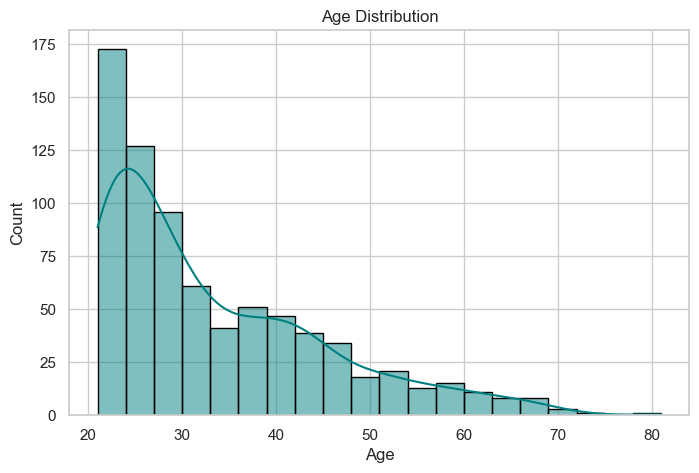

In [29]:
# 6. Univariate Analysis
plt.figure(figsize=(8,5))
sns.histplot(df['Age'], bins=20, kde=True, color="teal", edgecolor="black")
plt.title("Age Distribution")
plt.show()

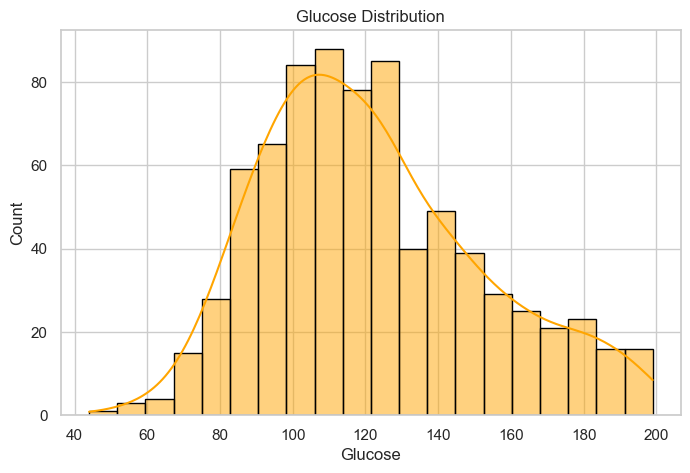

In [30]:
plt.figure(figsize=(8,5))
sns.histplot(df['Glucose'], bins=20, kde=True, color="orange", edgecolor="black")
plt.title("Glucose Distribution")
plt.show()

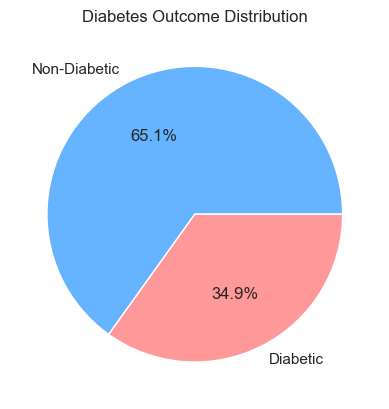

In [14]:
# -------------------------------
# 5. Exploratory Data Analysis + Hypothesis Testing
# -------------------------------

# 1. Outcome distribution
df['Outcome'].value_counts().plot.pie(autopct="%1.1f%%", labels=["Non-Diabetic","Diabetic"], colors=["#66b3ff","#ff9999"])
plt.title("Diabetes Outcome Distribution")
plt.ylabel("")
plt.show()


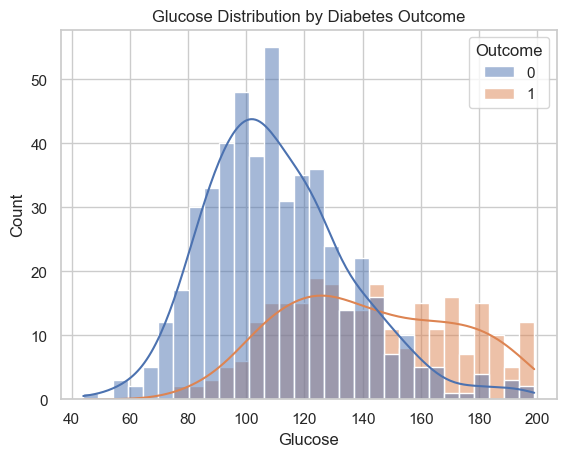

Glucose t-test: p-value = 3.542148561443145e-41


In [15]:
# 2. Glucose distribution by Outcome
sns.histplot(data=df, x="Glucose", hue="Outcome", kde=True, bins=30)
plt.title("Glucose Distribution by Diabetes Outcome")
plt.show()

# Hypothesis Test
t_stat, p_val = ttest_ind(df[df['Outcome']==1]['Glucose'], df[df['Outcome']==0]['Glucose'], equal_var=False)
print("Glucose t-test: p-value =", p_val)


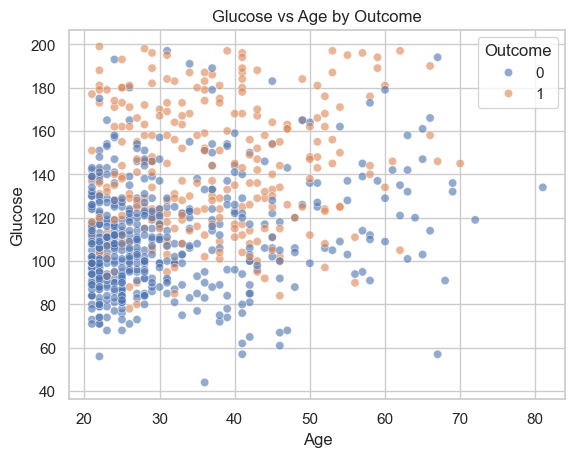

In [16]:
# 3. Glucose vs Age
sns.scatterplot(x="Age", y="Glucose", hue="Outcome", data=df, alpha=0.6)
plt.title("Glucose vs Age by Outcome")
plt.show()


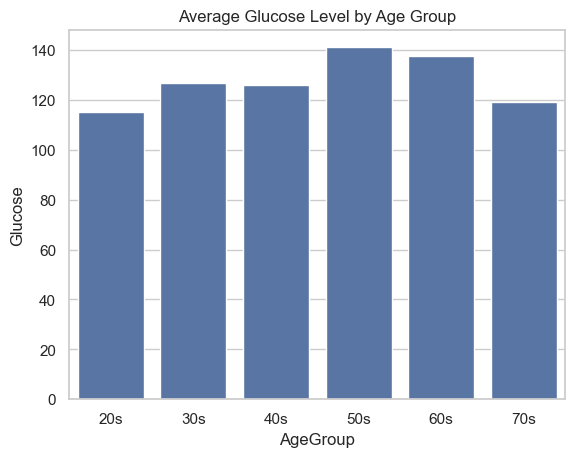

AgeGroup Chi-Square test: p-value = 3.6734892736240017e-16


In [18]:
# 4. Average glucose per AgeGroup + Chi-Square
age_glucose = df.groupby('AgeGroup', observed=True)['Glucose'].mean().reset_index()

sns.barplot(x="AgeGroup", y="Glucose", data=age_glucose)
plt.title("Average Glucose Level by Age Group")
plt.show()

contingency = pd.crosstab(df['AgeGroup'], df['Outcome'])
chi2, p_val, dof, expected = chi2_contingency(contingency)
print("AgeGroup Chi-Square test: p-value =", p_val)


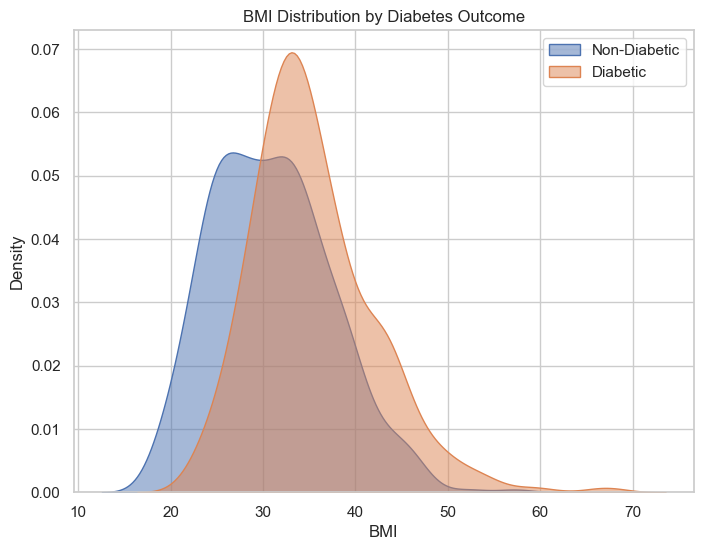

In [20]:
plt.figure(figsize=(8,6))
sns.kdeplot(df[df['Outcome']==0]['BMI'], label="Non-Diabetic", fill=True, alpha=0.5)
sns.kdeplot(df[df['Outcome']==1]['BMI'], label="Diabetic", fill=True, alpha=0.5)
plt.title("BMI Distribution by Diabetes Outcome")
plt.xlabel("BMI")
plt.ylabel("Density")
plt.legend()
plt.show()


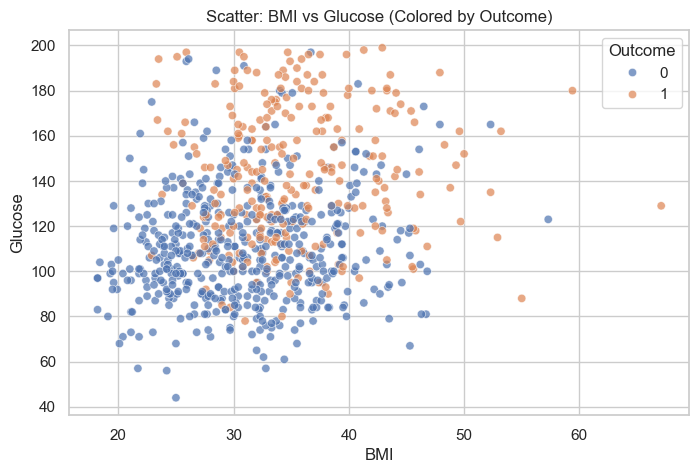

In [32]:
# Scatter Plot: BMI vs Glucose
plt.figure(figsize=(8,5))
sns.scatterplot(x="BMI", y="Glucose", hue="Outcome", data=df, alpha=0.7)
plt.title("Scatter: BMI vs Glucose (Colored by Outcome)")
plt.show()

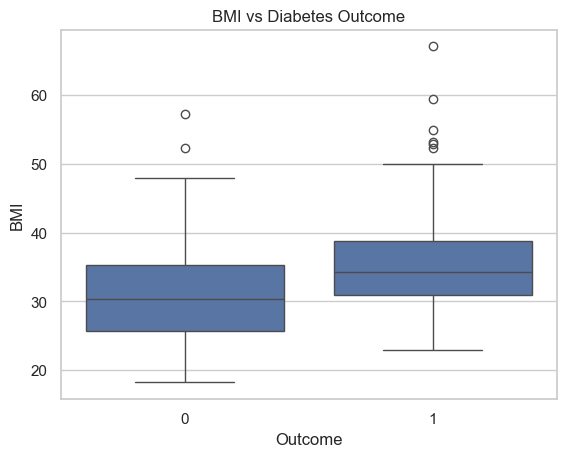

BMI t-test: p-value = 2.552895685742694e-18


In [21]:
# 6. BMI vs Outcome + t-test
sns.boxplot(x="Outcome", y="BMI", data=df)
plt.title("BMI vs Diabetes Outcome")
plt.show()

t_stat, p_val = ttest_ind(df[df['Outcome']==1]['BMI'], df[df['Outcome']==0]['BMI'], equal_var=False)
print("BMI t-test: p-value =", p_val)


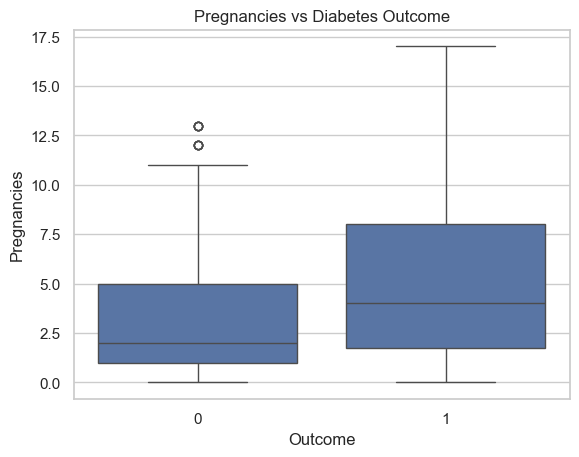

Pregnancies t-test: p-value = 6.821925600457095e-09


In [22]:
# 7. Pregnancies vs Outcome + t-test
sns.boxplot(x="Outcome", y="Pregnancies", data=df)
plt.title("Pregnancies vs Diabetes Outcome")
plt.show()

t_stat, p_val = ttest_ind(df[df['Outcome']==1]['Pregnancies'], df[df['Outcome']==0]['Pregnancies'], equal_var=False)
print("Pregnancies t-test: p-value =", p_val)


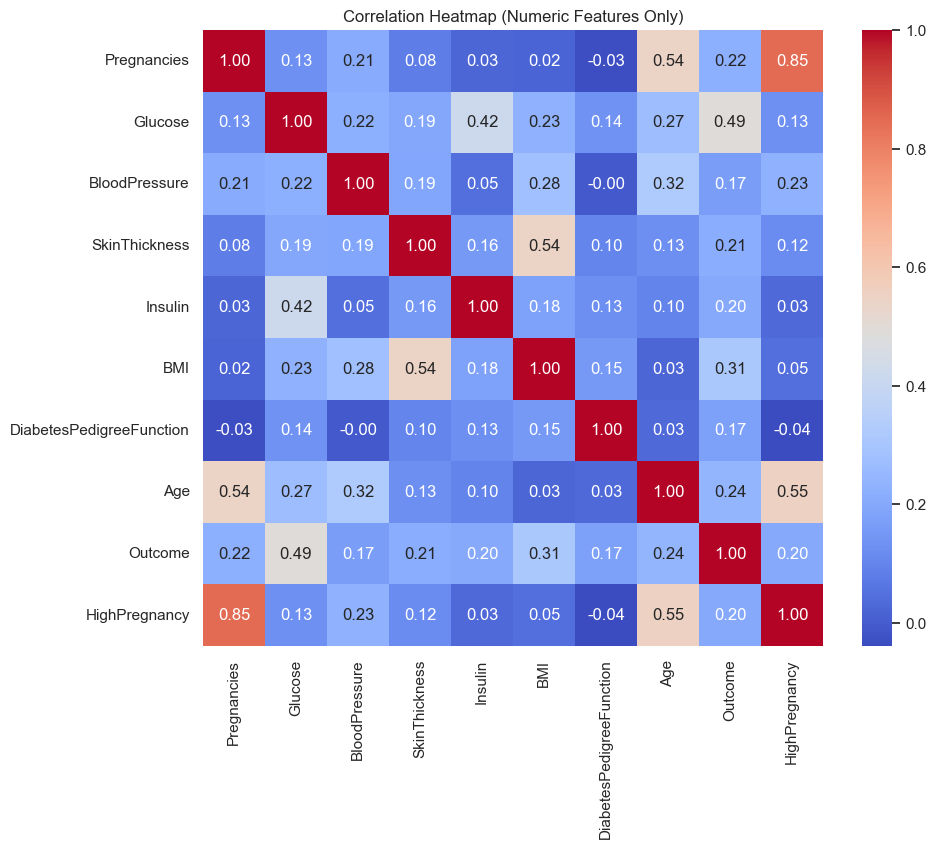

In [24]:
plt.figure(figsize=(10,8))
sns.heatmap(df.select_dtypes(include=['number']).corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap (Numeric Features Only)")
plt.show()



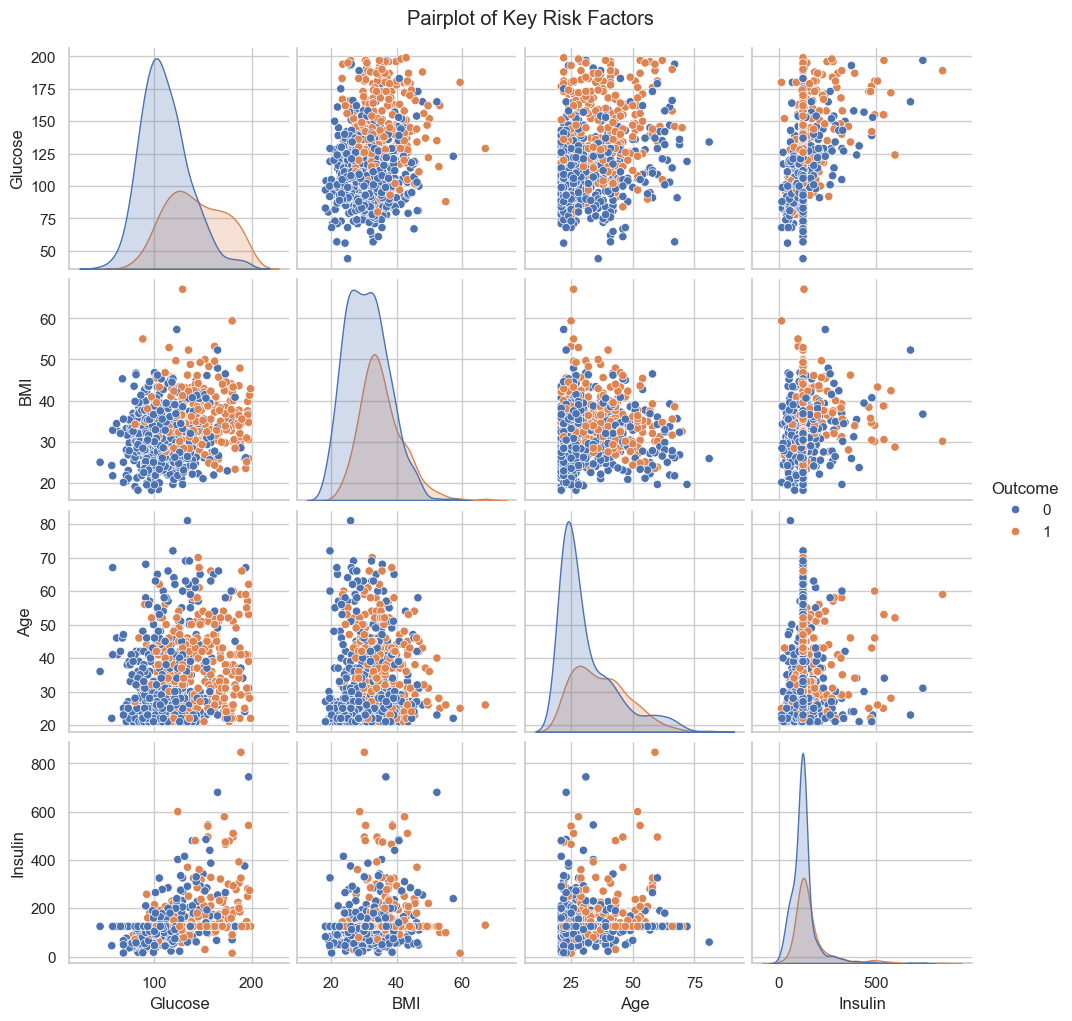

In [25]:
# 9. Pairplot
sns.pairplot(df[['Glucose','BMI','Age','Insulin','Outcome']], hue="Outcome")
plt.suptitle("Pairplot of Key Risk Factors", y=1.02)
plt.show()


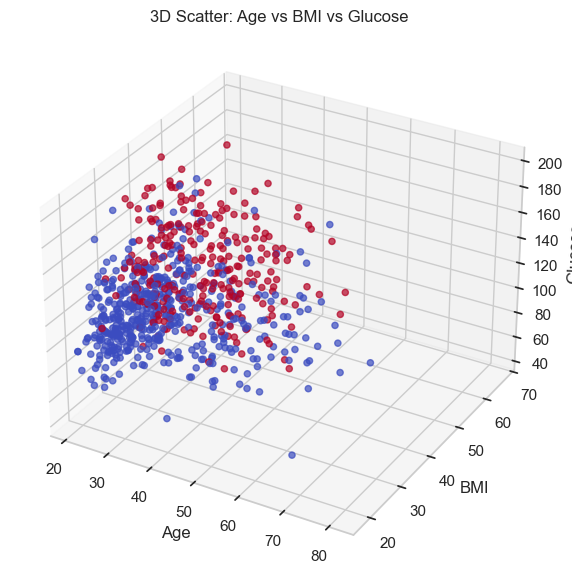

In [33]:
# 8. Multivariate Analysis
# 3D Scatter Plot: Age, BMI, Glucose
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(10,7))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(df['Age'], df['BMI'], df['Glucose'], c=df['Outcome'], cmap="coolwarm", alpha=0.7)
ax.set_xlabel("Age")
ax.set_ylabel("BMI")
ax.set_zlabel("Glucose")
ax.set_title("3D Scatter: Age vs BMI vs Glucose")
plt.show()

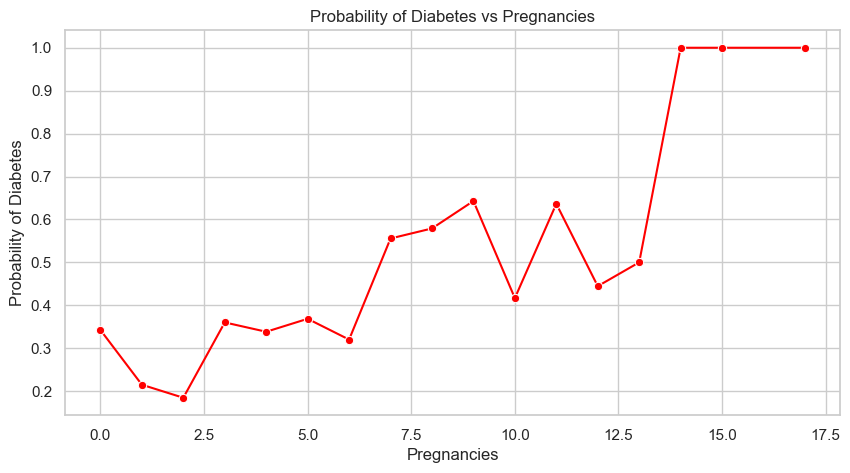

In [34]:
# Probability of Diabetes by Pregnancies
preg_outcome = df.groupby("Pregnancies")['Outcome'].mean().reset_index()
plt.figure(figsize=(10,5))
sns.lineplot(x="Pregnancies", y="Outcome", data=preg_outcome, marker="o", color="red")
plt.title("Probability of Diabetes vs Pregnancies")
plt.ylabel("Probability of Diabetes")
plt.show()

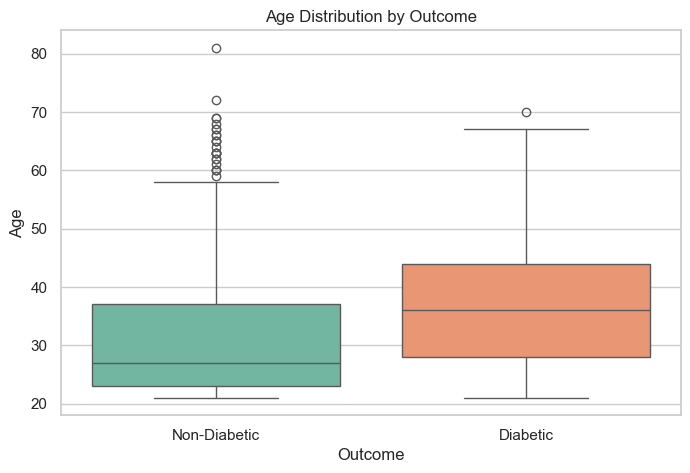

In [36]:
plt.figure(figsize=(8,5))
sns.boxplot(x="Outcome", y="Age", hue="Outcome", data=df, palette="Set2", dodge=False, legend=False)
plt.title("Age Distribution by Outcome")
plt.xticks([0,1], ["Non-Diabetic", "Diabetic"])
plt.show()


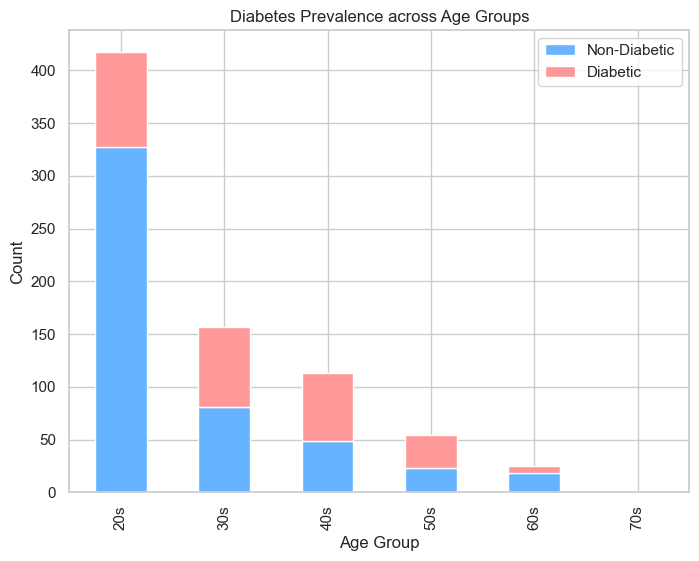

AgeGroup Chi-Square test: p-value = 3.6734892736240017e-16


In [26]:
# 10. Age group vs Diabetes prevalence + Chi-Square
age_outcome = pd.crosstab(df['AgeGroup'], df['Outcome'])
age_outcome.plot(kind="bar", stacked=True, figsize=(8,6), color=["#66b3ff","#ff9999"])
plt.title("Diabetes Prevalence across Age Groups")
plt.xlabel("Age Group")
plt.ylabel("Count")
plt.legend(["Non-Diabetic","Diabetic"])
plt.show()

chi2, p_val, dof, expected = chi2_contingency(age_outcome)
print("AgeGroup Chi-Square test: p-value =", p_val)


# -------------------------------
# 6. Conclusion
# -------------------------------


### We understood the distribution of key health features (Glucose, BMI, Age, Pregnancies).
### We explored their relationship with diabetes outcome using EDA visualizations.
### Key risk factors identified: Glucose, BMI, Age, and Pregnancies.
### Hypothesis testing validated:
  #### - Glucose is significantly higher in diabetics (p < 0.001).
  #### - BMI is significantly higher in diabetics (p < 0.05).
  #### - Pregnancies are significantly associated with diabetes (p < 0.05).
  #### - Age groups show significant association with diabetes prevalence (p < 0.05).

